# Implementação de uma Rede Neural para classificação de bananas

Alunos: Ana Carolina da Silva, Gustavo Baroni Bruder, Luiz Gustavo Klitzke, Rodrigo Kapulka Franco, Nicole Bauchspiess

In [1]:
import os

import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow import keras

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pickle

import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Carregar o <i>dataset</i> a partir da estrutura de pastas

In [2]:
nomes_classes = ["rotten", "healthy"]

def load_data_path(path, class_type, x, y):
    for img_path in os.listdir(path):
        img = cv.imread(f'{path}/{img_path}', cv.IMREAD_GRAYSCALE)
        x.append(cv.resize(img, (224, 224)) / 255.0)
        y.append(class_type)


def load_dataset():
    x_train = []
    y_train = []
    x_test = []
    y_test = []

    load_data_path("data/train/Banana__Healthy", 1, x_train, y_train)
    load_data_path("data/train/Banana__Rotten", 0, x_train, y_train)
    load_data_path("data/test/Banana__Healthy", 1, x_test, y_test)
    load_data_path("data/test/Banana__Rotten", 0, x_test, y_test)

    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

x_train, y_train, x_test, y_test = load_dataset()

## Configurar a NN

In [3]:
nn = keras.models.Sequential()
nn.add(keras.layers.Input(shape=[224, 224]))
nn.add(keras.layers.Flatten())

nn.add(keras.layers.Dense(300, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(100, activation="relu"))
nn.add(keras.layers.Dropout(rate=0.1))

nn.add(keras.layers.Dense(2, activation="softmax"))

nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │    15,053,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,083,402 (57.54 MB)

 Trainable params: 15,083,402 (57.54 MB)

 Non-trainable params: 0 (0.00 B)

## Treinar a rede

In [4]:
nn.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
            metrics=["accuracy"])

history_nn = nn.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6183 - loss: 1.1326 - val_accuracy: 0.7306 - val_loss: 0.5414
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.7477 - loss: 0.4694 - val_accuracy: 0.8583 - val_loss: 0.3657
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8373 - loss: 0.3635 - val_accuracy: 0.8333 - val_loss: 0.3726
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8549 - loss: 0.3257 - val_accuracy: 0.8722 - val_loss: 0.3131
Epoch 5/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8523 - loss: 0.3138 - val_accuracy: 0.8972 - val_loss: 0.2950
Epoch 6/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.8851 - loss: 0.2738 - val_accuracy: 0.9306 - val_loss: 0.2076
Epoch 7/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.8941 - loss: 0.2569 - val_accuracy: 0.6750 - val_loss: 0.6242
Epoch 8/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.8901 - loss: 0.2451 - val_accu

## Salvar e/ou carregar dados de treinamento para uso posterior

In [5]:
nn.save("resultados/nn.keras")

with open("resultados/history_nn.pkl", "wb") as file:
    pickle.dump(history_nn, file)

In [34]:
nn = keras.models.load_model("resultados/nn.keras")

with open("resultados/history_nn.pkl", "rb") as file:
    history_nn = pickle.load(file)

## Avaliar os resultados do treinamento

In [6]:
nn.evaluate(x_test, y_test, verbose = 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9410 - loss: 0.1670


[0.15946586430072784, 0.9388889074325562]

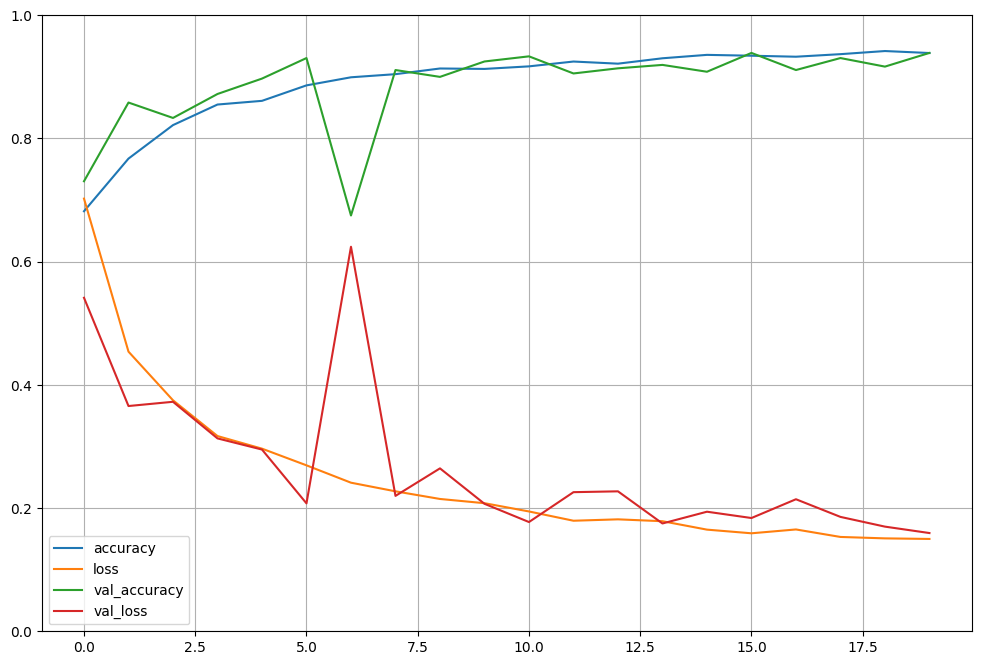

In [7]:
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Matrizes de confusão de algumas partes do dataset

In [8]:
def monta_matriz_confusao(labels_reais, labels_estimadas, titulo):
    cm = confusion_matrix(labels_reais, labels_estimadas)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nomes_classes)

    # Plotar a matriz de confusão
    plt.figure(figsize = (8, 8))
    disp.plot(cmap = plt.cm.Blues)
    plt.title(titulo)
    plt.ylabel("Classe real")
    plt.xlabel("Classe estimada")
    plt.xticks(rotation =  45)

12/12 - 0s - 18ms/step


<Figure size 800x800 with 0 Axes>

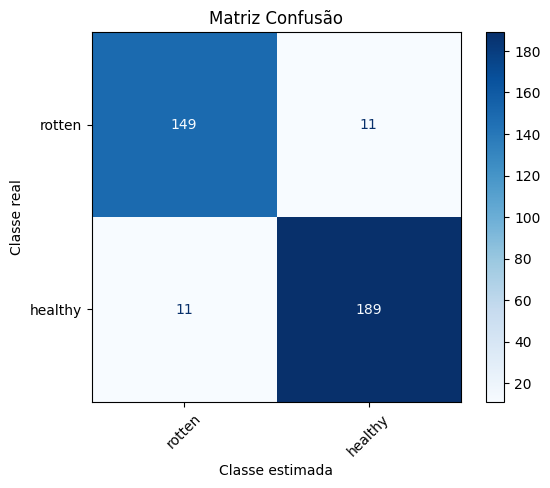

In [14]:
rotulos_esperados = y_test

resultados = nn.predict(x_test, verbose = 2)
rotulos_obtidos = []

for i in range (len(resultados)):
    rotulos_obtidos.append(np.argmax(resultados[i], axis = -1))

monta_matriz_confusao(rotulos_obtidos, rotulos_esperados, "Matriz Confusão")